In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [45]:
df=pd.read_csv('911.csv.zip')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266543 entries, 0 to 266542
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        266543 non-null  float64
 1   lng        266543 non-null  float64
 2   desc       266543 non-null  object 
 3   zip        234049 non-null  float64
 4   title      266543 non-null  object 
 5   timeStamp  266543 non-null  object 
 6   twp        266448 non-null  object 
 7   addr       266543 non-null  object 
 8   e          266543 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 18.3+ MB


In [47]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


# What are the top 5 zipcode for 911 calls

In [48]:
df['zip'].value_counts().head(5)

19401.0    18401
19464.0    17937
19403.0    13366
19446.0    12828
19406.0     8820
Name: zip, dtype: int64

# what are the top 5 township(twp) for 911 calls

In [49]:
df['twp'].value_counts().head(5)

LOWER MERION    22886
ABINGTON        16379
NORRISTOWN      15421
UPPER MERION    14015
CHELTENHAM      12272
Name: twp, dtype: int64


# how many nunique title codes are there?

In [50]:
df['title'].nunique()

130

# For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS

In [51]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

# What is the most common Reason for a 911 call based off of this new column?

In [52]:
df['Reason'].value_counts()

EMS        133234
Traffic     93400
Fire        39909
Name: Reason, dtype: int64

# Now use seaborn to create a countplot of 911 calls by Reason.

<AxesSubplot:xlabel='Reason', ylabel='count'>

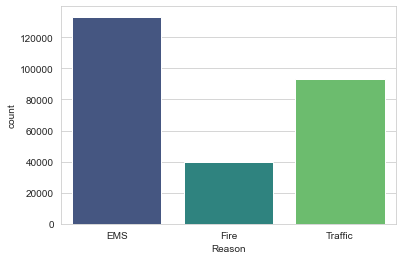

In [53]:
sns.countplot(x='Reason',data=df,palette='viridis')

# Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column

In [54]:
type(df['timeStamp'].iloc[0])

str

# You should have seen that these timestamps are still strings. Use pd.to_datetime to convert the column from strings to DateTime objects.

In [55]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

# You can now grab specific attributes from a Datetime object by calling them. For example

In [56]:
time = df['timeStamp'].iloc[0]
time.hour

17

# the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week.

In [57]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

# Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week

In [58]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [59]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [60]:
df['Day of Week'] = df['Day of Week'].map(dmap) 

# Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column

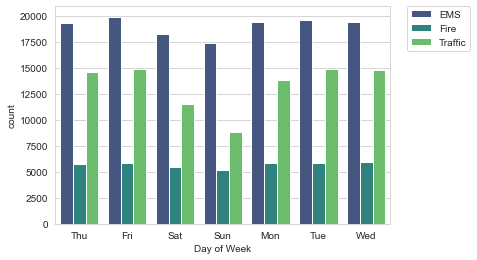

In [61]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# now do the same for month

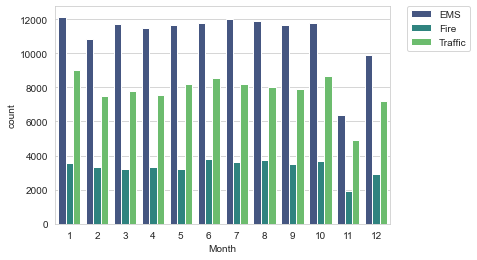

In [62]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [63]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,24701,24701,24701,21877,24701,24701,24692,24701,24701,24701,24701,24701
2,21663,21663,21663,19161,21663,21663,21658,21663,21663,21663,21663,21663
3,22743,22743,22743,20160,22743,22743,22732,22743,22743,22743,22743,22743
4,22343,22343,22343,19671,22343,22343,22336,22343,22343,22343,22343,22343
5,23093,23093,23093,20254,23093,23093,23082,23093,23093,23093,23093,23093


# Now create a simple plot off of the dataframe indicating the count of calls per month.

<AxesSubplot:xlabel='Month'>

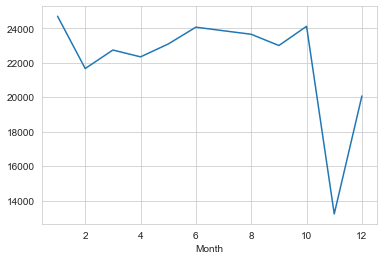

In [64]:
# Could be any column
byMonth['twp'].plot()

# Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column

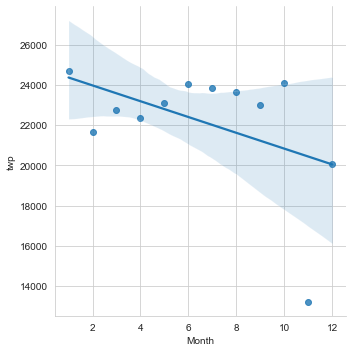

In [65]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [66]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

# Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls

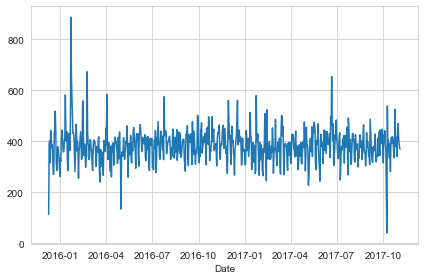

In [67]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()


# ** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

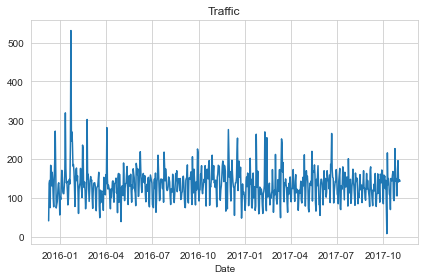

In [68]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

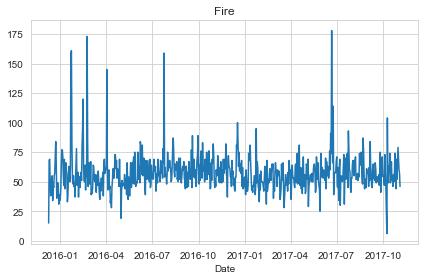

In [69]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

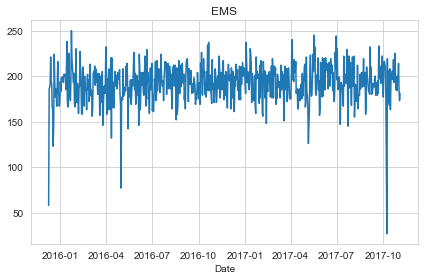

In [70]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

# Now We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.

In [71]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,716,643,577,522,493,631,1070,1722,2007,2111,...,2479,2688,2804,2721,2140,2041,1752,1497,1416,1109
Mon,746,572,542,493,546,711,1064,1806,2267,2320,...,2296,2508,2617,2617,2254,1814,1591,1257,1077,818
Sat,914,804,718,651,597,626,767,1021,1302,1656,...,2134,2053,2065,2055,1982,1896,1640,1503,1324,1206
Sun,952,835,815,665,578,618,730,939,1192,1519,...,1902,1780,1802,1853,1822,1700,1436,1267,986,904
Thu,713,545,591,491,488,666,1126,1837,2131,2247,...,2410,2568,2571,2761,2274,1872,1631,1443,1153,927


# Now create a HeatMap using this new DataFrames

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

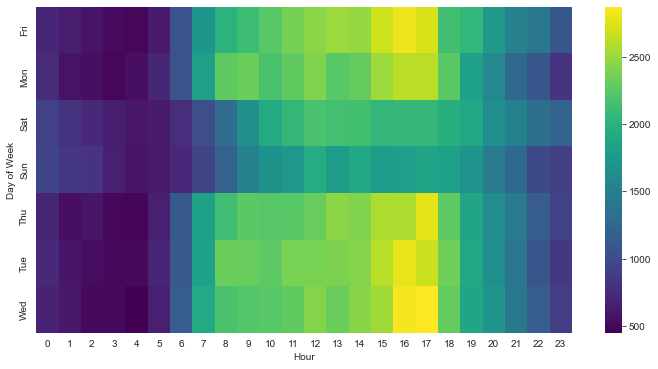

In [72]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

# Now create the cluster using dataframes

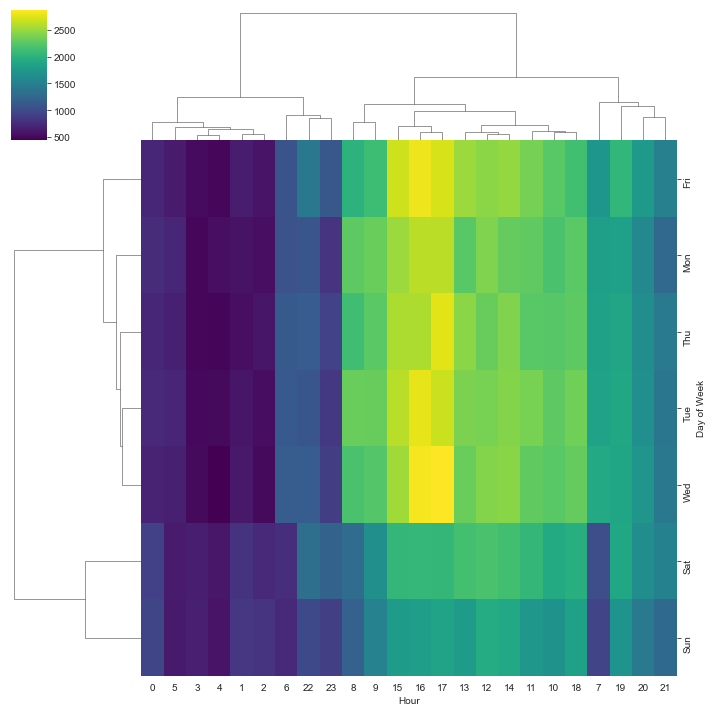

In [73]:
sns.clustermap(dayHour,cmap='viridis')

# * Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. 

In [74]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,3527,3171,3532,3574,3278,3747,3736,3297,4226,3433,2069,3116
Mon,3706,3552,3103,3088,3538,3264,3687,3325,3031,4250,1682,2777
Sat,3527,2871,2539,3490,2764,3024,3515,2810,3144,3042,1516,2975
Sun,3470,2339,2229,3026,2580,2679,3259,2658,2565,3172,1281,2177
Thu,3182,3189,3909,3097,3289,4095,3248,3507,3702,3189,2006,3264


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

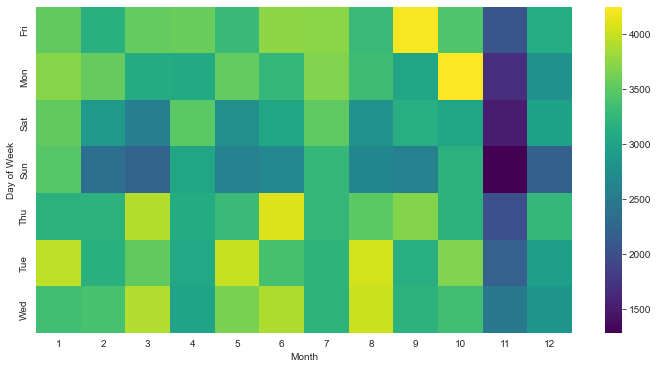

In [42]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

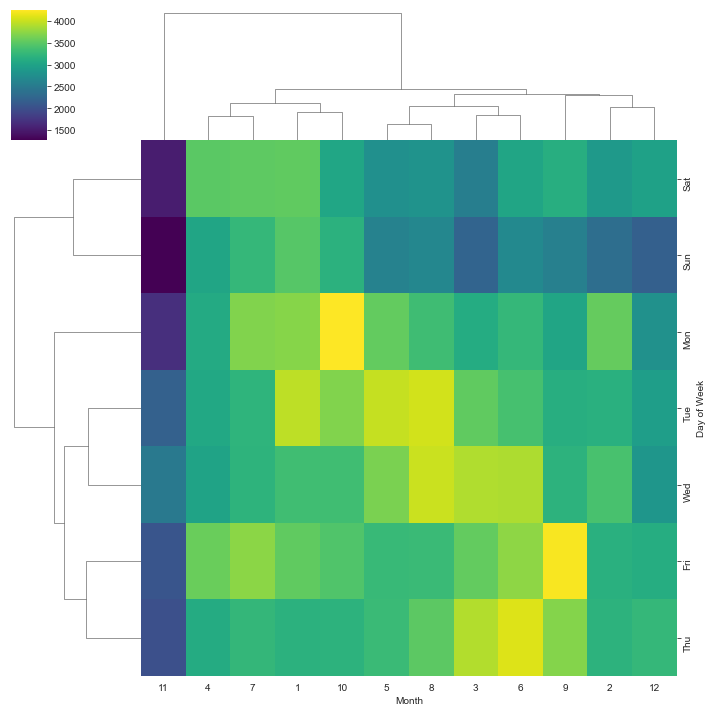

In [43]:
sns.clustermap(dayMonth,cmap='viridis')